# Tarea 1 Inteligencia artificial: introducción a conexionistas básicos
Jose Aguilar Salas - Adriana Rojas Mesén

RESUMEN

Se trabaja con un conjunto de datos obtenidos por medio de una serie de recorridos efectuados por un robot. Por medio del uso
de la plataforma TensorFlow 2.0 se demuestra que la clasificacion de estos datos no puede hacerse por medio de neuronas de tipo perceptrón aisladas ni por medio de una red sin capa oculta. Por lo que se realiza un estudio exhaustivo teniendo como parámetros el número de neuronas, tasa de aprendizaje, uso de término de momento o ausencia del mismo, número de iteraciones, mecanismos de optimización, entre otros.


INTRODUCCIÓN

La Inteligencia Computacional (CI) puede ser considerada una subrama de la Inteligencia Artificial (IA), la cual se concentra
en el estudio de los mecanismos adaptativos, haciendo uso de paradigmas de IA, para permitir o facilitar el comportamiento
inteligente en entornos complejos y cambiantes para generalizar, abstraer, descubrir y asociar. La CI cubre los paradigmas de
redes neuronales artificiales, computacion evolutiva, inteligencia de enjambre, sistemas inmunes artificiales y sistemas difusos. 

Los sistemas neuronales biologicos con su capacidad de aprender, memorizar y hasta generalizar, impulsaron la investigación en modelados algorítmicos, conocidos como redes neuronales artificiales. Esta es una red en capas de neuronas artificiales,
puede constar de una capa de entrada, capas ocultas y una capa de salida. Todas las neuronas artificiales de una capa están
conectadas exhaustivamente a las neuronas artificiales de la siguiente capa. Las redes neuronales artificiales están destinadas a resolver una tarea específica, de tamaño moderado y según las limitaciones de potencia computacional y almacenamiento; se han utilizado para una amplia gama de aplicaciones, desde el diagnóstico de enfermedades, reconocimiento de voz, procesamiento de imagenes, reconocimiento de patrones, estrategias de juego y muchos otros. 

La forma más simple de una red neuronal se conoce como perceptrón, la cual es utilizada principalmente para la clasificación de patrones linealmente separables, es decir, patrones que se encuentran a ambos lados de un hiperplano. Consiste en una neurona artificial con pesos sinápticos y umbral ajustables.

DESCRIPCIÓN DEL PROBLEMA

Un robot de tipo SCITOS G5 esta dotado de un conjunto de 24 sensores reales, los cuales por sus características y
experimentos realizados, se convierten en 4 sensores virtuales, en las posiciones: frontal, trasera, izquierda y derecha. De
estos sensores se obtiene un conjunto de datos, cada uno con una etiqueta que lo clasifica en función de la acción: movimiento hacia delante, leve giro a la derecha, giro brusco a la derecha, leve giro a la izquierda.

Se requiere demostrar que con el conjunto de datos obtenidos la clasificación no puede hacerse por medio de neuronas de tipo perceptrón aisladas, ni siquiera conectadas en forma de red sin capa oculta, sino que necesitan una capa oculta para abordar adecuadamente este problema. Además, se solicita determinar una combinación óptima en los valores de los parámetros para estudiar el resultado del clasificador. Esto haciendo uso de las herramientas y software disponibles, además de lo aprendido en la teoría del curso y de recursos bibliográficos. 

METODOLOGÍA

Para el problema presentado se realizan una serie de pasos para obtener la solución más óptima. En donde primeramente se realiza un estudio de la teoría aprendida en el curso sobre Redes Neuronales Artificiales, además de plataformas, entornos informáticos y distintos recursos disponibles para la realización de esta tarea. 

Luego, se carga el set de datos obtenido de UCI Machine Learning Repository "Wall-Following Robot Navigation", en donde se definen las entradas: Frente, Izquierda, Derecha, Atrás; y las etiquetas: movimiento hacia delante, leve giro a la derecha, giro brusco a la derecha, leve giro a la izquierda. Este conjunto de datos se grafica y se analiza para obtener conclusiones acerca del uso de neuronas de tipo perceptrón aisladas o al conectarlas en forma de red sin capa oculta.

Ya con estos datos (entradas y etiqueta) en arrays, se dividen los datos de entrada en dos conjuntos: entrenamiento y prueba; para así dar inicio a una red neuronal y realizar un estudio exhaustivo en la variación de los hiperparámetros como: número de neuronas, tasa de aprendizaje, uso de término de momento o ausencia del mismo, número de iteraciones, mecanismos de optimización, entre otros.

Los resultados de la variación de estos hiperparámetros se estudian mediante el análisis de los valores que toman la pérdida "loss" y la precisión "accuracy" de los resultados, así como el análisis de las curvas de estos. 

DESARROLLO Y ANÁLISIS

Inicialmente se trabajaron los datos de forma que pudieran estar dispoibles para simplementa trabajar los distintos puntos del desarrollo.

Importando librerías y bibliotencas

In [1]:
#importando bibliotecas
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

In [2]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from matplotlib import pyplot as pl
print('version:', keras.__version__)

version: 2.6.0


Cargando la base de datos

In [3]:
#Para extraer los datos del archivo .data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00194/sensor_readings_4.data",
                names = ["Frente","Izquierda","Derecha","Atras","Etiqueta"])

Revisando los datos

In [4]:
#Muestra los primeros datos que obtuvimos de la base de datos
data.head()

#Muestra los últimos datos que obtuvimos de la base de datos
data.tail()

#Indica cuantas filas y columnas de datos existen
data.shape

(5456, 5)

In [5]:
#Dividiendo de los datos, los valores de entrada y las etiquetas

#Datos de entrada
entradas=data[['Frente','Izquierda','Derecha','Atras']]

#Etiquetas de cada dato
etiquetas = data['Etiqueta']

#Revisar que la información vaya por buen camino
print(entradas)
print(etiquetas)

      Frente  Izquierda  Derecha  Atras
0      1.687      0.445    2.332  0.429
1      1.687      0.449    2.332  0.429
2      1.687      0.449    2.334  0.429
3      1.687      0.449    2.334  0.429
4      1.687      0.449    2.334  0.429
...      ...        ...      ...    ...
5451   1.024      0.657    1.087  1.562
5452   0.894      0.649    1.071  1.085
5453   0.873      0.642    1.053  1.105
5454   0.967      0.635    1.034  1.118
5455   0.854      0.628    1.016  1.168

[5456 rows x 4 columns]
0       Slight-Right-Turn
1       Slight-Right-Turn
2       Slight-Right-Turn
3       Slight-Right-Turn
4       Slight-Right-Turn
              ...        
5451         Move-Forward
5452     Sharp-Right-Turn
5453     Sharp-Right-Turn
5454         Move-Forward
5455     Sharp-Right-Turn
Name: Etiqueta, Length: 5456, dtype: object


In [6]:
#Se realiza un arreglo con las etiquetas del sistema
etiq_opt = ['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']

#Se le asigna un numero a cada etiqueta, de forma que:
#      esto ----> ['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']
#se mapea a ----> [0,1,2,3]
mapeo = {}
for x in range(len(etiq_opt)):
    mapeo[etiq_opt[x]] = x

#Para revisar que se haya hecho correctamente.
print(mapeo)

{'Move-Forward': 0, 'Slight-Right-Turn': 1, 'Sharp-Right-Turn': 2, 'Slight-Left-Turn': 3}


In [7]:
#Se modifica el arreglo de las etiquetas asignandole su numero correspondiente.
for x in range(len(etiquetas)):
    etiquetas[x] = mapeo[etiquetas[x]]

    
#Para verificar que se haya hecho correctamente
print(etiquetas)

<ipython-input-7-b1f7e51b321b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etiquetas[x] = mapeo[etiquetas[x]]


0       1
1       1
2       1
3       1
4       1
       ..
5451    0
5452    2
5453    2
5454    0
5455    2
Name: Etiqueta, Length: 5456, dtype: object


In [8]:
#Tranforma las entradas en un array
entr_arr = np.array(entradas)

#Tranforma los datos de etiquetas en un array
etiq_arr = np.array(etiquetas)

#Para verificar que se hizo correctamente
print(entr_arr)
print(etiq_arr)

[[1.687 0.445 2.332 0.429]
 [1.687 0.449 2.332 0.429]
 [1.687 0.449 2.334 0.429]
 ...
 [0.873 0.642 1.053 1.105]
 [0.967 0.635 1.034 1.118]
 [0.854 0.628 1.016 1.168]]
[1 1 1 ... 2 0 2]


In [9]:
#La funcion "to_categorical" asigna un arreglo a cada etiqueta de valor numerico
#si la etiqueta es "Move-Forward=0" resultaria en [1,0,0,0]
one_hot_encode = to_categorical(etiq_arr)

#Para verificar que se hizo correctamente
print(one_hot_encode)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


Inicia el desarrollo y análisis de cada punto.

In [10]:
#graficando los datos de los sensores para demostrar sobre puntos 1 y 2:
x0=[]
y0=[]
z0=[]
w0=[]

x1=[]
y1=[]
z1=[]
w1=[]

x2=[]
y2=[]
z2=[]
w2=[]

x3=[]
y3=[]
z3=[]
w3=[]

for i in range(len(etiq_arr)):
    if etiq_arr[i]==0:    #Move forward
        x0.append(entr_arr[i][0])
        y0.append(entr_arr[i][1])
        z0.append(entr_arr[i][2])
        w0.append(entr_arr[i][3])

    elif etiq_arr[i]==1:    #Slight-Right-Turn
        x1.append(entr_arr[i][0])
        y1.append(entr_arr[i][1])
        z1.append(entr_arr[i][2])
        w1.append(entr_arr[i][3])

    elif etiq_arr[i]==2:    #Sharp-Right-Turn
        x2.append(entr_arr[i][0])
        y2.append(entr_arr[i][1])
        z2.append(entr_arr[i][2])
        w2.append(entr_arr[i][3])

    else:    #Slight-Left-Turn
        x3.append(entr_arr[i][0])
        y3.append(entr_arr[i][1])
        z3.append(entr_arr[i][2])
        w3.append(entr_arr[i][3])

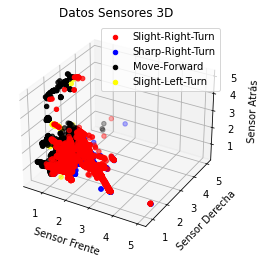

In [11]:
fig=plt.figure()

ax=fig.add_subplot(111,projection='3d')

ax.scatter3D(x0,z0,w0,c="red",cmap='Set1')
ax.scatter3D(x1,z1,w1,c="blue",cmap='Set1')
ax.scatter3D(x2,z2,w2,c="black",cmap='Set1')
ax.scatter3D(x3,z3,w3,c="yellow",cmap='Set1')

plt.title("Datos Sensores 3D")
plt.ylabel("Sensor Derecha")
plt.xlabel("Sensor Frente")
ax.set_zlabel("Sensor Atrás")
plt.legend(["Slight-Right-Turn","Sharp-Right-Turn","Move-Forward","Slight-Left-Turn"], loc="upper right")

plt.show()

1 - Demuestren que efectivamente la clasificación no puede hacerse haciendo uso de un perceptrón aislado.

El perceptrón simple o aislado tan sólo puede discriminar entre dos clases linealmente separables, es decir, clases cuyas regiones de decisión pueden ser separadas mediante una única condición lineal o hiperplano. 
Para demostrar que la clasificación no puede hacerse haciendo uso de un perceptrón aislado, basta con conocer que hay cuatro clasificaciones posibles, estas nunca podrán ser separadas por una única condición lineal.

2 - Demuestren que efectivamente la clasificación no puede hacerse haciendo uso de una red de perceptrones, pero donde se conecten directamente (en forma exhaustiva) las entradas a las salidas.

Para los problemas con regiones de decisión más complejas exigen distintas estrategias de separación. Dichas estrategias las proporcionan las capas ocultas. Por lo tanto, en una red neuronal sin capas ocultas normalmente solo se
pueden tener relaciones lineales entre la entrada y la salida. Así mismo al observar los datos graficados, en donde es notable que estos no son linealmente separables y estás todos muy mezclados entre sí.

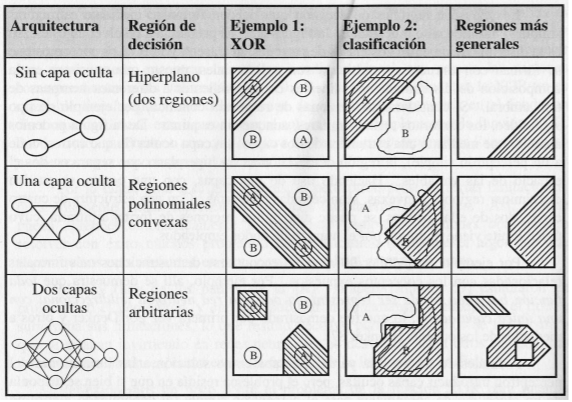

3 - Hagan un estudio exhaustivo de la clasificación de los datos, por medio de una red perceptrón con una única capa oculta, teniendo como parámetros a estudiar: número de neuronas, tasa de aprendizaje, uso de término de momento o ausencia del mismo, número de iteraciones, mecanismos de optimización (al menos dos diferentes). 

Se realizó el desarrollo de una red neuronal artificial para obtener un clasificador. Se variaron los hiperparámetros para la red perceptrón con una unica capa oculta, de forma que fuera posible obtener un resultado satisfactorio de accuracy mediante un entrenamiento correcto de la red.

Respecto al caso del hiperparámetro número de neuronas en la capa oculta este se debería aumentar si la accuracy que se obtiene no es suficiente, además que al aumentar el número de neuronas en la capa oculta es posible disponer de muchos cortes diferentes ya que cada neurona puede cortar el plano de entrada de una manera determinada. De esta forma, trazando bastantes líneas sobre el espacio de entrada se puede realizar una mejor clasificación. Ya que se deseaba aumentar la precision de la red este hiperparámetro se fue aumentando hasta obtener buenos resultados.

Para el hiperparámetro de la tasa de aprendizaje, con la variación de esta se controla qué tan rápido o lento se entrena la red, respecto a la búsqueda de los pesos óptimos. Básicamente este se debe aumentar si se da el caso que el proceso de obtener la mínima perdida se da muy lentamente. Sin embargo el aumentarlo de más, pues puede generar que los pasos sean muy grandes y el proceso de la obtención de los pesos óptimos nunca pueda llegar a un valor satisfactorio. El momentum es útil cuando se da el caso que se desee eliminar las oscilaciones de los pasos si la tasa de aprendizaje es muy alta.

Por otro lado, el numero de iteraciones será el necasario para que la red se entrene y funcione correctamente, esto es cuando la curva de entrenamiento se empieza a mantener constante. Conforme el número de iteraciones se hace muy grande en ocasiones es posible ver que no se observan resultados distintos.

En cuanto a los mecanismos de optimizacion se tienen el Adam y SGD. El primero se refiere al Desenso de Gradiente con estimacion adaptativa del momentum y es uno de los mecanismos más robustos en la actualidad. En el caso de la SGD se refiere a la optimizacion por descenso de gradiente y este es un mecanismo relativamente básico, que por lo general necesita más iteraciones que el primero comentado.



4 - Determinen la mejor combinación de dichos parámetros haciendo uso de las herramientas explicadas en clase, y justificando las decisiones tomadas por medio de una explicación del comportamiento de cada parámetro.

Finalmente, se determinó la mejor combinación de hiperparámetros: Para el número de neuronas se escogieron 12, pues con este númerp se obtuvo una precisión razonable, además que de agregar más de esta cantidad no mejoraba significativamente la precisión y el hecho de utilizar más neuronas implica disponer de más recursos. La tasa de aprendizaje escogida fue de 0.03, con ayuda de los experimentos fue posible observar que este fue el valor óptimo para obtener una rapidez en la obtención de la
mínima perdida en la curva de entrenamiento, además de mantenerse más constante y no oscilar, sin que se desestabilizara. Además, no se hizo uso del de momentum, pues los datos no presentaban oscilaciones y la optimización se obtuvo de forma relativamente rapida. El número de iteraciones escogido fue de 20, ya que este fue el número que resultó suficiente para obtener un buen valor de accuracy superando incluso el 95% y asegurarnos que no se desestabilizara, aunque fue posible observar valores de accuracy mayores al 91% desde la iteración 6.
Respecto al mecanismo de optimización se utilizó el ADAM, ya que después de los experimentos se comprobó que es el más robusto y además permite realizar menos número de iteraciones.

Seguidamente, es posible observar el desarrollo de la red neuronal artificial optimizada para el proceso.

Transformando datos y etiquetas 

In [12]:
#Se divide a los datos en 2 conjuntos, entrenamiento (80%) y prueba (20%) 
X_train, X_test, y_train, y_test= model_selection.train_test_split(entr_arr, one_hot_encode, train_size=0.8, test_size=0.2, random_state=42)


Iniciando el desarrollo de la Red Neuronal

In [13]:
#Se inicializa la red neuronal
modelo = keras.Sequential()

#Capa oculta donde se conectan las 4 entradas
#Se utiliza función de activación sigmoide para la capa oculta
#Con 12 neurones se obtuvieron buenos resultados
modelo.add(keras.layers.Dense(12, activation = "sigmoid", input_shape = (4,)))   

#Capa de Salida, con cuatro neuronas correspondientes a las salidas
modelo.add(keras.layers.Dense(4, activation = "sigmoid"))

#Se coloca un optimizador Adam.
#función de pérdida huber
#tase de aprendizaje de 0.03
modelo.compile(loss="huber", optimizer=keras.optimizers.Adam(learning_rate=0.03), metrics = ["accuracy"])        

#modelo.compile(loss="huber", optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics = ["accuracy"])  
#modelo.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1), metrics = ["categorical_accuracy"])

Epoch 1/20
137/137 [==============================] - 1s 4ms/step - loss: 0.0728 - accuracy: 0.5765 - val_loss: 0.0558 - val_accuracy: 0.6886
Epoch 2/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.6943 - val_loss: 0.0457 - val_accuracy: 0.7463
Epoch 3/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.7456 - val_loss: 0.0370 - val_accuracy: 0.8150
Epoch 4/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.8456 - val_loss: 0.0335 - val_accuracy: 0.8416
Epoch 5/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.8951 - val_loss: 0.0246 - val_accuracy: 0.9176
Epoch 6/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9164 - val_loss: 0.0229 - val_accuracy: 0.8672
Epoch 7/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9248 - val_loss: 0.0189 - val_accuracy: 0.9377
Epoch 

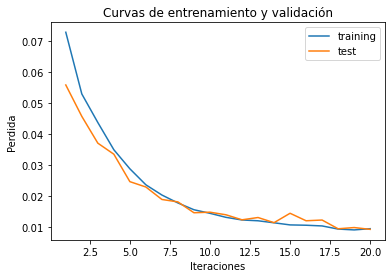

[[7.1981549e-04 2.3947524e-07 9.9999124e-01 6.5112981e-06]
 [9.9534327e-01 2.6168823e-03 1.1961420e-05 8.3375573e-03]
 [9.9786985e-01 8.1211329e-04 1.3288856e-04 7.5020492e-03]
 ...
 [5.0991833e-02 2.3404048e-09 9.8699486e-01 1.4058053e-03]
 [9.8092425e-01 9.3905032e-03 2.5398060e-06 1.3062060e-03]
 [9.3306166e-01 6.6093862e-02 5.3747804e-06 9.7855926e-03]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [14]:
#Se ingresan los datos de entrenamiento y de prueba para validación
history = modelo.fit(X_train, y_train, epochs=20, verbose=1, validation_data = (X_test, y_test))
#Con X## iteraciones es sufuciente para obtener un resultado satisfactorio

xc=range(1,21)   #Cantidad de iteraciones

#resultados obtenidos (curvas de entrenamiento y validación)
plt.plot(xc,history.history["loss"])
plt.plot(xc,history.history["val_loss"])
plt.title("Curvas de entrenamiento y validación")
plt.ylabel("Perdida")
plt.xlabel("Iteraciones")
plt.legend(["training","test"])
plt.show()

#Se realiza una predicción con los datos de prueba
prediccion = modelo.predict(X_test)
print(prediccion)
print(y_test)

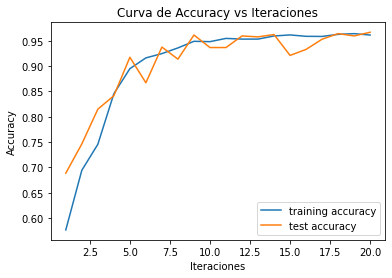

In [15]:
xc=range(1,21)   #Cantidad de iteraciones
#resultados obtenidos de Accuracy
plt.plot(xc,history.history["accuracy"])
plt.plot(xc,history.history["val_accuracy"])
plt.title("Curva de Accuracy vs Iteraciones")
plt.ylabel("Accuracy")
plt.xlabel("Iteraciones")
plt.legend(["training accuracy","test accuracy"])
plt.show()

5 - Estúdiese y analícese el resultado del clasificador, por medio del método adecuado.

En las siguientes figuras se muestran las curvas de entrenamiento y validacion para el resultande de la clasificación con 20 y 100 iteraciones, respectivamente, para observar que la red no se desestabiliza con el número de iteraciones sin embargo tampoco se ve que muestre mejora. Es posible observar que la accuracy comienza con un valor relativamente bajo, porque los
pesos se encuentran al azar, y luego se va incrementando conforme se modifican los pesos para un funcionamiento óptimo.

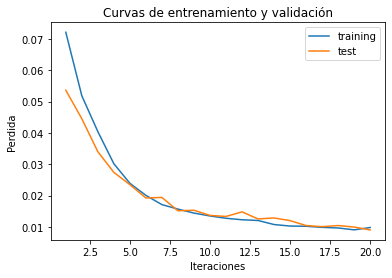

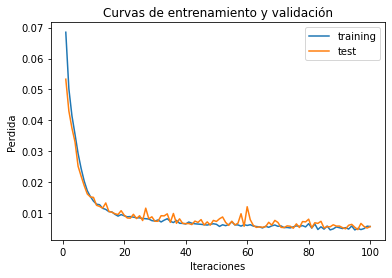

Ademas, se analiza mediante las siguientes gráficas, la precisión de la red con 20 y 100 iteraciones, respectivamente, para observar que la red tiene un óptimo comportamiento que como se dijo anteriormente se obtienen valores de accuracy superando incluso el 95% superando de forma rápida valores de accuracy mayores al 91% desde prontas iteraciones. 

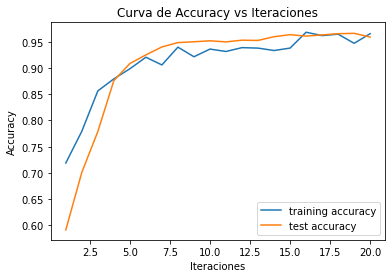

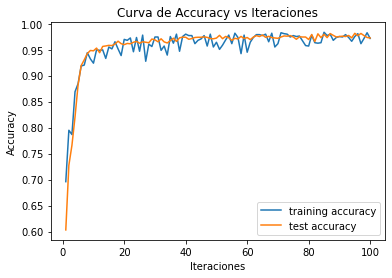

6 - Una vez desarrollado el clasificador neuronal, represéntense gráficamente las fronteras lineales de separación obtenidas, para cada combinación de 3 parámetros. Analizando dichas representaciones gráficas ¿Qué afirmaciones directas, demostrables y útiles para el problema pueden hacerse sobre los parámetros? Razónese la respuesta con base a la teoría explicada y evidencias que puedan observarse en las gráficas. 

Para el desarrollo de este punto se fueron variando 3 diferentes hiperparámetros, el número de neuronas, la tasa de aprendizaje, y el número de iteraciones, mediante el código que se recicló de los puntos anteriores.

Variando el número de neuronas, con tasa de aprendizaje de 0.03 y usando 50 iteraciones:

Utilizando solamente 2 neuronas en la capa oculta:

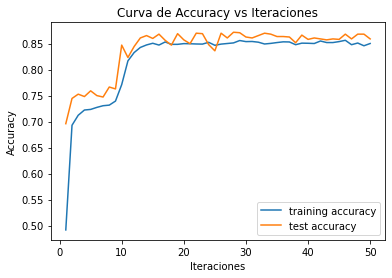

Utilizando 16 neuronas en la capa oculta:
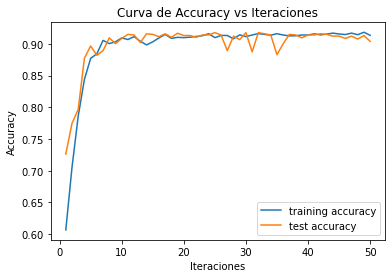

Utilizando 48 neuronas en la capa oculta:
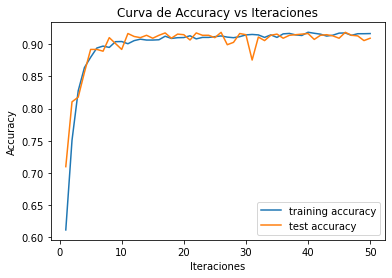

Es posible observar que con solamente 2 neuronas es insuficiente para obtener un accuracy aceptable, puesto que como se dijo anteriormente, al aumentar el número de nueronas en la capa oculta es posible disponer de muchos cortes diferentes ya que cada neurona puede cortar el plano de entrada de una manera determinada, como se puede comprobar con 16 neuronas, donde se encuentra un accuracy aceptable, al igual que con 48 neuronas, de esta forma es posible comprobar que llega un punto en el que sumar más neuronas a la capa oculta puede no ser de utilidad para la red.

Variando la  tasa de aprendizaje, con número de neuronas de 12 y usando 50 iteraciones:

Utilizando tasa de aprendizaje de 0.003
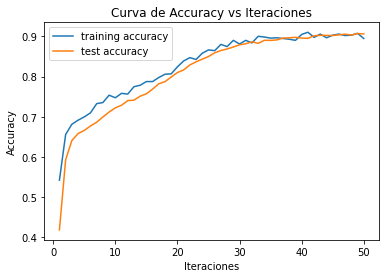

Utilizando tasa de aprendizaje de 0.3
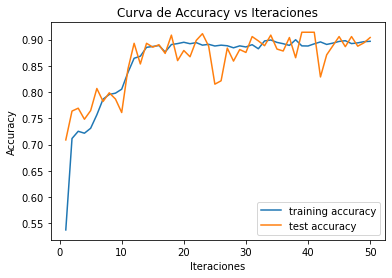

Utilizando tasa de aprendizaje de 3
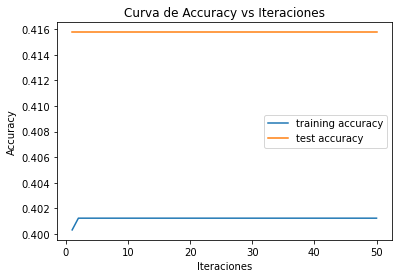

Analizando lo obtenido es posible notar que el hiperparámetro de la tasa de aprendizaje es de suma importancia pues como se puede observar y comparando con el resultado óptimo del punto 4, en el cual se usó una tasa de 0.03, al usar una tasa menor como el primer ejemplo, se afirma que conforme disminuye se obtienen resultados después de varias iteraciones, alrededor de las 40, sin embargo se logra un buen porcentaje de accuracy de 90%. Con una tasa de 0.3 es posible observar que hay fluctuaciones en la gráfica de accuracy debido a steps muy grandes, esto se observa aún más en la última gráfica donde no se logra estabilizar correctamente la red.

Un ejemplo del uso de steps pequeños con muchas iteraciones para ver el comportamiento de la red:
Con 12 neuronas, tasa de aprendizaje de 0.001 y 1000 iteraciones:
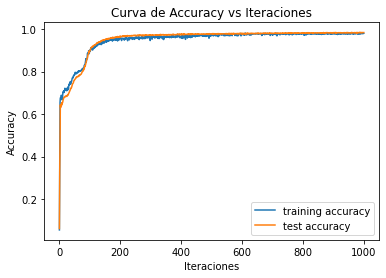
Es posible notar como aunque gasta más recursos debido a tantas iteraciones para el entrenamiento y test, experimenta un excelente comportamiento que llega cercano al 99%.

Utilizando el mecanismo de optimización de SGD, el cual es más básico y menos robusto que el ADAM:
Con 12 neuronas, una tasa de aprendizaje de 1 y 100 iteraciones
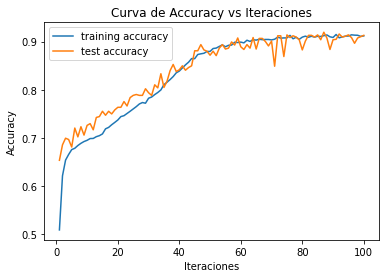

Ahora con 12 neuronas, una tasa de aprendizaje de 0.1 y 200 iteraciones
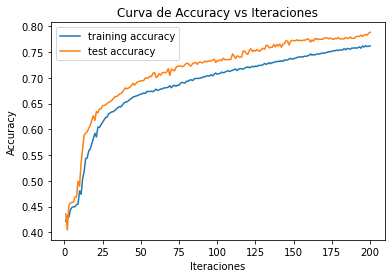
Comparándolo con el ADAM queda expuesto que para esta clasificación resulta contraproducente el uso del optimizador SGD, pues retrasa en términos de iteraciones un correcto funcionamiento para una tasa de 1, mientras que con una tasa de aprendizaje de 0.1 no llega a superar el 80% de accuracy a las 200 iteraciones.

Es posible relacionar todo lo visto en este punto en que para obtener una correcta clasificación, se necesita realizar una serie de experimentos con el fin de obtener una mejor combinación, pues aunque se puede notar qué produce modificar los hiperparámetros, el cómo se relacionan en conjunto para solventar una tarea no tiene un método para optener los valores óptimos. El código utilizado fue el siguiente:

In [16]:
#Reciclando código anteriormente usado para una revisión de lo comentado:
#Se inicializa la red neuronal
modelo = keras.Sequential()

#Capa oculta donde se conectan las 4 entradas
#Se utiliza función de activación sigmoide para la capa oculta
#Con 12 neurones se obtuvieron buenos resultados
modelo.add(keras.layers.Dense(12, activation = "sigmoid", input_shape = (4,)))   

#Capa de Salida, con cuatro neuronas correspondientes a las salidas
modelo.add(keras.layers.Dense(4, activation = "sigmoid"))

#Se coloca un optimizador Adam.
#función de pérdida huber
#tase de aprendizaje de 0.03
modelo.compile(loss="huber", optimizer=keras.optimizers.Adam(learning_rate=0.03), metrics = ["accuracy"])        



#Se coloca un optimizador SGD.
#función de pérdida mse
#tase de aprendizaje de 1
#modelo.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics = ["accuracy"])

Epoch 1/50
137/137 [==============================] - 1s 4ms/step - loss: 0.0680 - accuracy: 0.6077 - val_loss: 0.0545 - val_accuracy: 0.7289
Epoch 2/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.7149 - val_loss: 0.0405 - val_accuracy: 0.7674
Epoch 3/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.8055 - val_loss: 0.0337 - val_accuracy: 0.8599
Epoch 4/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8728 - val_loss: 0.0263 - val_accuracy: 0.8965
Epoch 5/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9063 - val_loss: 0.0215 - val_accuracy: 0.9386
Epoch 6/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9331 - val_loss: 0.0191 - val_accuracy: 0.9570
Epoch 7/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9475 - val_loss: 0.0163 - val_accuracy: 0.9560
Epoch 

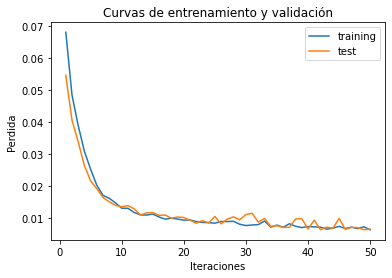

[[3.6964374e-07 3.9289416e-15 1.0000000e+00 2.7155136e-12]
 [9.9988425e-01 1.3647414e-05 1.0910733e-06 3.0182898e-03]
 [9.9978924e-01 1.4215636e-05 2.2545232e-06 7.0124269e-03]
 ...
 [1.7123520e-03 5.9250103e-15 9.9997532e-01 1.0552931e-06]
 [9.9828529e-01 1.9276142e-04 5.1192126e-07 1.6684830e-03]
 [9.9673659e-01 1.4322996e-03 1.6558323e-06 3.4368038e-04]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


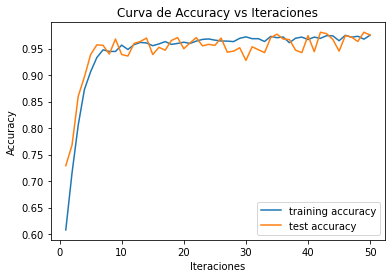

In [17]:
#Se ingresan los datos de entrenamiento y de prueba para validación
history = modelo.fit(X_train, y_train, epochs=50, verbose=1, validation_data = (X_test, y_test))
#Con X## iteraciones es sufuciente para obtener un resultado satisfactorio

xc=range(1,51)   #Cantidad de iteraciones

#resultados obtenidos (curvas de entrenamiento y validación)
plt.plot(xc,history.history["loss"])
plt.plot(xc,history.history["val_loss"])
plt.title("Curvas de entrenamiento y validación")
plt.ylabel("Perdida")
plt.xlabel("Iteraciones")
plt.legend(["training","test"])
plt.show()

#Se realiza una predicción con los datos de prueba
prediccion = modelo.predict(X_test)
print(prediccion)
print(y_test)

#resultados obtenidos de Accuracy
plt.plot(xc,history.history["accuracy"])
plt.plot(xc,history.history["val_accuracy"])
plt.title("Curva de Accuracy vs Iteraciones")
plt.ylabel("Accuracy")
plt.xlabel("Iteraciones")
plt.legend(["training accuracy","test accuracy"])
plt.show()

7 - Tomen el conjunto de datos originales y altérenlos de la siguiente forma: generen un nivel de ruido aleatorio para cada variable, por medio de la suma o resta de una cantidad aleatoria que oscile entre el 3% y el 6% del promedio de cada una. Ahora, generen una nueva red neuronal que clasifique estos mismos datos, y comparen los resultados con los obtenidos anteriormente.

De esta manera fue posible notar cómo afecta al funcionamiento de la red neuronal el aplicarle ruido a los datos de entrada, notandose que aunque con valores entre el 3% y 6% del promedio de cada dato (en este caso, se genera un ruido de tipo gaussiano). Al crear una nueva red neuronal que clasifique estos mismos datos, se logra apreciar fluctuaciones en las curvas de test y training. Esto se debe a que hay un error inherente en los datos causado, precisamente, por la presencia de ruido. Así mismo, y como es de esperarse según lo aprendido en la teoría, el valor de la pérdida "loss" aumenta con la presencia de ruido y el valor de la precisión "accuracy" resulta disminuido, estos podríamos mencionar, en un valor proporcional al ruido añadido. Ya que no se observan muchos cambios respecto a la funcionalidad pues el experimento presenta un porcentaje de accuracy aceptable, analizamos que puede deberse a que los datos de entrada como se pudo observar, son valores pequeños que no ocuparon normalización alguna. 

Se procedió a continuar con los experimentos, agregando un 10% de ruido respecto al valor de cada dato se observa que la red ya no presenta un accuracy aceptable, manteniéndose en aproximandamente en 85% con 50 iteraciones, y aún más con un experimento utilizando 20%, donde el valor de accuracy no se aproxima ni siquiera al 80%, por lo que se evidenció como el ruido afecta el óptimo funcionamiento de una red neuronal.

A continuación estas gráficas demuestran el valor de accuracy de la red respecto a los cambios hechos en el ruido impuesto a la red:

Con valores entre 3% y 6%
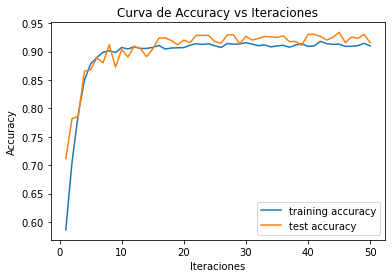

Con 10%
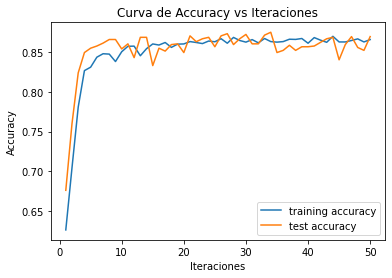

Con 20%
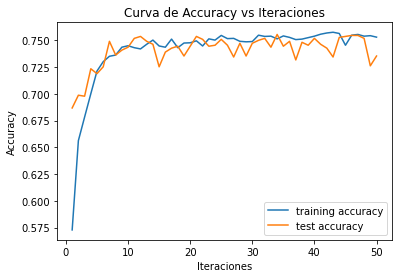


El proceso realizado se detalla a continuación.

In [18]:
#Para extraer los datos del archivo .data
data7 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00194/sensor_readings_4.data",
                names = ["Frente","Izquierda","Derecha","Atras","Etiqueta"])

In [19]:
#Datos de entrada
entradas7=data7[['Frente','Izquierda','Derecha','Atras']]
print(entradas7)

      Frente  Izquierda  Derecha  Atras
0      1.687      0.445    2.332  0.429
1      1.687      0.449    2.332  0.429
2      1.687      0.449    2.334  0.429
3      1.687      0.449    2.334  0.429
4      1.687      0.449    2.334  0.429
...      ...        ...      ...    ...
5451   1.024      0.657    1.087  1.562
5452   0.894      0.649    1.071  1.085
5453   0.873      0.642    1.053  1.105
5454   0.967      0.635    1.034  1.118
5455   0.854      0.628    1.016  1.168

[5456 rows x 4 columns]


In [20]:
#Tranforma las entradas en un array
entr_arr7 = np.array(entradas)
print(entr_arr7)

[[1.687 0.445 2.332 0.429]
 [1.687 0.449 2.332 0.429]
 [1.687 0.449 2.334 0.429]
 ...
 [0.873 0.642 1.053 1.105]
 [0.967 0.635 1.034 1.118]
 [0.854 0.628 1.016 1.168]]


In [21]:
import random
porc = random.randint(3, 6) #número random entre 3 y 6
#porc = 10  #o 20 dependiendo del experimento
#print(porc)

mu, sigma = 0, ((entr_arr7*porc)/100)  # /100 para obtener porcentaje
# creando un array de ruido con la misma dimensión del dataset (5456,4) 
noise = np.random.normal(mu, sigma, [5456,4]) 
#print(noise)

entrada7 = entr_arr7 + noise
print(entrada7)

[[1.6544517  0.44701865 2.39342256 0.44761964]
 [1.61575843 0.45073975 2.32322063 0.4285738 ]
 [1.66534644 0.44922909 2.2341757  0.42597486]
 ...
 [0.81551647 0.6876661  1.08514221 1.12241203]
 [0.96086955 0.65359836 1.14657531 1.09723982]
 [0.8408364  0.64090883 0.94205671 1.18065207]]


In [22]:
#Se divide a los datos en 2 conjuntos, entrenamiento (80%) y prueba (20%) 
X_train, X_test, y_train, y_test= model_selection.train_test_split(entrada7, one_hot_encode, train_size=0.8, test_size=0.2, random_state=42)

In [23]:
#Se inicializa la red neuronal
modelo = keras.Sequential()

#Capa oculta donde se conectan las 4 entradas
#Se utiliza función de activación sigmoide para la capa oculta
#Con 12 neurones se obtuvieron buenos resultados
modelo.add(keras.layers.Dense(12, activation = "sigmoid", input_shape = (4,)))   

#Capa de Salida, con cuatro neuronas correspondientes a las salidas
modelo.add(keras.layers.Dense(4, activation = "sigmoid"))

#Se coloca un optimizador Adam.
#función de pérdida huber
#tase de aprendizaje de 0.03
modelo.compile(loss="huber", optimizer=keras.optimizers.Adam(learning_rate=0.03), metrics = ["accuracy"])        

#modelo.compile(loss="huber", optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics = ["accuracy"])  
#modelo.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1), metrics = ["categorical_accuracy"])

Epoch 1/50
137/137 [==============================] - 1s 5ms/step - loss: 0.0691 - accuracy: 0.6143 - val_loss: 0.0529 - val_accuracy: 0.7308
Epoch 2/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.7090 - val_loss: 0.0431 - val_accuracy: 0.7582
Epoch 3/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.7764 - val_loss: 0.0367 - val_accuracy: 0.8086
Epoch 4/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.8385 - val_loss: 0.0299 - val_accuracy: 0.8782
Epoch 5/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8875 - val_loss: 0.0258 - val_accuracy: 0.8864
Epoch 6/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9088 - val_loss: 0.0216 - val_accuracy: 0.9048
Epoch 7/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9184 - val_loss: 0.0218 - val_accuracy: 0.9029
Epoch 

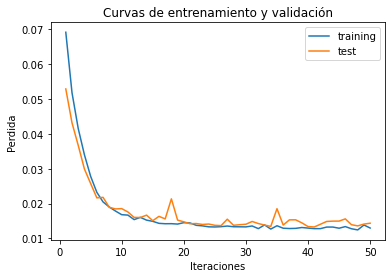

[[6.7995609e-07 7.3719208e-12 1.0000000e+00 2.4992173e-11]
 [9.9063921e-01 1.1411577e-02 4.6771765e-04 1.0557771e-03]
 [9.8698241e-01 1.3689250e-02 2.1623075e-03 4.1100383e-04]
 ...
 [7.4683726e-03 6.2653917e-11 9.9827945e-01 9.6374981e-07]
 [9.8794746e-01 4.7841370e-03 6.2181476e-05 2.0761490e-03]
 [8.9464331e-01 2.2501430e-01 6.1294436e-04 4.5463443e-04]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


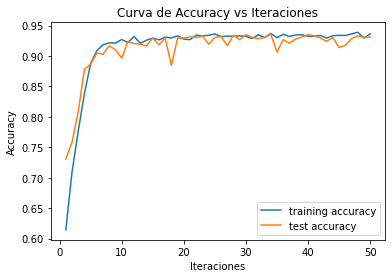

In [24]:
#Se ingresan los datos de entrenamiento y de prueba para validación
history = modelo.fit(X_train, y_train, epochs=50, verbose=1, validation_data = (X_test, y_test))
#Con X## iteraciones es sufuciente para obtener un resultado satisfactorio

xc=range(1,51)   #Cantidad de iteraciones

#resultados obtenidos (curvas de entrenamiento y validación)
plt.plot(xc,history.history["loss"])
plt.plot(xc,history.history["val_loss"])
plt.title("Curvas de entrenamiento y validación")
plt.ylabel("Perdida")
plt.xlabel("Iteraciones")
plt.legend(["training","test"])
plt.show()

#Se realiza una predicción con los datos de prueba
prediccion = modelo.predict(X_test)
print(prediccion)
print(y_test)

xc=range(1,51)   #Cantidad de iteraciones
#resultados obtenidos de Accuracy
plt.plot(xc,history.history["accuracy"])
plt.plot(xc,history.history["val_accuracy"])
plt.title("Curva de Accuracy vs Iteraciones")
plt.ylabel("Accuracy")
plt.xlabel("Iteraciones")
plt.legend(["training accuracy","test accuracy"])
plt.show()

REFERENCIAS

[1] Crespo, J. Loaiza, R. Meza, F. (2021), “Tema 2: Redes Neuronales Artificiales”. Area académica de Ingeniería Mecatronica.

[2] Andries P. Engelbrecht “Computational Intelligence: An Introduction”. (2ª edicion, 2007, Wiley).

[3] Munoz, J. “Inteligencia Computacional Inspirada en la Vida”. (1ª edicion, 2010-2011). [online]. https://cutt.ly/jz46giT

[4] UCI Machine Learning Repository. “Wall-Following Robot Navigation Data Data Set”. [online]. https://archive.ics.uci.edu/ml/datasets/WallFollowing+Robot+Navigation+Dat